In [1]:
from keras.models import load_model
import cv2
import numpy as np

In [2]:
model = load_model('model-007.model')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
source=cv2.VideoCapture(1)

labels_dict={1:'MASK',0:'NO MASK'}
color_dict={0:(0,0,255),1:(0,255,0)}

In [3]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.03,5)  

    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+h,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
        
    cv2.imshow('Face Mask Detector',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
source.release()
cv2.destroyAllWindows()


In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
img_array1=cv2.imread(r"C:\Users\charan\Desktop\data1\with_mask\1-with-mask.jpg")

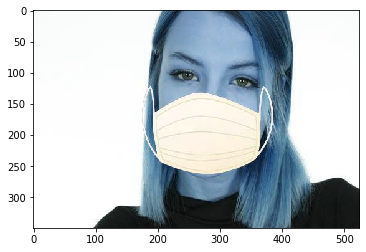

In [5]:
plt.imshow(img_array1)

In [6]:
img=img_array1
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face=face_clsfr.detectMultiScale(gray,1.03,5)  
for (x,y,w,h) in face:
    face_img=gray[y:y+h,x:x+w]
    resized=cv2.resize(face_img,(100,100))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,100,100,1))
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
    print(result)
    print(label)
    print(labels_dict[label])

[[0.0056751  0.99432486]]
1
MASK


In [7]:
img_array2=cv2.imread(r"C:\Users\charan\Desktop\data1\without_mask\0.jpg")

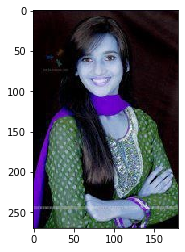

In [8]:
plt.imshow(img_array2)

In [9]:
img=img_array2
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
face=face_clsfr.detectMultiScale(gray,1.03,5)
for (x,y,w,h) in face:
    face_img=gray[y:y+h,x:x+w]
    resized=cv2.resize(face_img,(100,100))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,100,100,1))
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
print(result)
print(label)
print(labels_dict[label])

[[0.797705   0.20229499]]
0
NO MASK


In [ ]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the saved numpy arrays in the previous code

In [ ]:
y_pred=clf.predict(X_test)